Entropy of the optimized distribution: 4.44654058856117
sum of distribution:  1.0


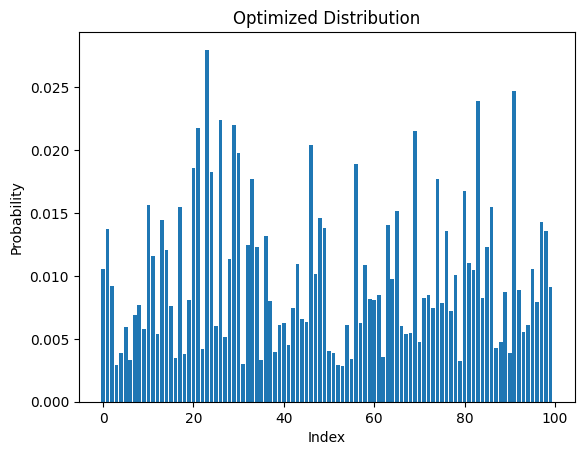

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

desired_entropy = 5
size_distribution = 100



#######################################################################################################
## In this section you can choose the original distribution before optimizing to get desired entropy ##
#######################################################################################################




# Initialize the parameters for a probability distribution (e.g., uniform)
# initial_distribution = np.ones(size_distribution) / size_distribution

# Initialize the parameters for a probability distribution (e.g., gaussian)
initial_distribution = np.random.normal(size=size_distribution)
initial_distribution = np.abs(initial_distribution)  # Make sure they are positive
initial_distribution /= initial_distribution.sum()  # Normalize

# Initialize the parameters for a probability distribution (e.g., exponential)
# initial_distribution = np.random.exponential(scale=1.0, size=size_distribution)
# initial_distribution /= initial_distribution.sum()  # Normalize

# Initialize the parameters for a probability distribution (e.g., beta)
# initial_distribution = np.random.beta(2, 5, size=size_distribution)  # Adjust the parameters as needed
# initial_distribution /= initial_distribution.sum()  # Normalize


epsilon = 1e-5  # Small epsilon value to prevent zero probabilities
initial_distribution += epsilon
initial_distribution /= initial_distribution.sum()  # Re-normalize after adding epsilon

def calculate_entropy(probabilities):
    return -np.sum(probabilities * np.log(probabilities))

def constraint_entropy(probabilities):
    return calculate_entropy(probabilities) - desired_entropy

# Define the optimization problem
constraints = ({'type': 'eq', 'fun': constraint_entropy})
result = minimize(calculate_entropy, initial_distribution, constraints=constraints, method='SLSQP')

# Extract the optimized probabilities
optimized_distribution = result.x

optimized_distribution /= np.sum(optimized_distribution)
# optimized_distribution /= np.sum(optimized_distribution)
print('Entropy of the optimized distribution:', calculate_entropy(optimized_distribution))
print("sum of distribution: ", np.sum(optimized_distribution))


# Plot the optimized distribution
plt.bar(range(size_distribution), optimized_distribution)
plt.xlabel('Index')
plt.ylabel('Probability')
entropy_value = calculate_entropy(optimized_distribution)

plt.title("Entropy: {:.5f}".format(entropy_value))
plt.show()

